In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import shutil
shutil.copy("/content/gdrive/MyDrive/Colab Notebooks/Explainability/pot_holes.zip", "/content/")

'/content/pot_holes.zip'

In [ ]:
!unzip /content/pot_holes.zip

Archive:  /content/pot_holes.zip
  inflating: normal/1.jpg            
  inflating: normal/10.jpg           
  inflating: normal/100.jpg          
  inflating: normal/101.jpg          
  inflating: normal/102.jpg          
  inflating: normal/103.jpg          
  inflating: normal/104.jpg          
  inflating: normal/105.jpg          
  inflating: normal/106.jpg          
  inflating: normal/107.jpg          
  inflating: normal/108.jpg          
  inflating: normal/109.jpg          
  inflating: normal/11.jpg           
  inflating: normal/110.jpg          
  inflating: normal/111.jpg          
  inflating: normal/112.jpg          
  inflating: normal/113.jpg          
  inflating: normal/114.jpg          
  inflating: normal/115.jpg          
  inflating: normal/116.jpg          
  inflating: normal/117.jpg          
  inflating: normal/118.jpg          
  inflating: normal/119.jpg          
  inflating: normal/12.jpg           
  inflating: normal/120.jpg          
  inflating: norm

In [ ]:
import os
import shutil

os.mkdir("dataset")
shutil.move("/content/normal", "/content/dataset")
shutil.move("/content/potholes", "/content/dataset")

'/content/dataset/potholes'

tensorflow: 2.7.0
keras: 2.7.0
Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.
{'normal': 0, 'potholes': 1}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:103: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
34/34 [==============================] - 28s 777ms/step - loss: 0.7079 - accuracy: 0.5358 - val_loss: 0.6693 - val_accuracy: 0.6562
Epoch 2/50
34/34 [==============================] - 27s 796ms/step - loss: 0.5670 - accuracy: 0.7038 - val_loss: 0.5417 - val_accuracy: 0.7031
Epoch 3/50
34/34 [==============================] - 28s 838ms/step - loss: 0.3899 - accuracy: 0.8208 - val_loss: 0.5928 - val_accuracy: 0.7031
Epoch 4/50
34/34 [==============================] - 28s 821ms/step - loss: 0.3678 - accuracy: 0.8396 - val_loss: 0.4313 - val_accuracy: 0.7734
Epoch 5/50
34/34 [==============================] - 26s 767ms/step - loss: 0.3343 - accuracy: 0.8604 - val_loss: 0.4870 - val_accuracy: 0.7734
Epoch 6/50
34/34 [==============================] - 26s 796ms/step - loss: 0.3223 - accuracy: 0.8623 - val_loss: 0.3913 - val_accuracy: 0.8516
Epoch 7/50
34/34 [==============================] - 27s 783ms/step - loss: 0.2627 - accuracy: 0.9038 - val_loss: 0.3669 - val_accuracy: 0.8203

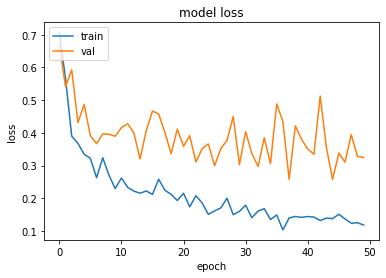

In [ ]:
from __future__ import print_function

import tensorflow as tf
import tensorflow.keras
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam


import matplotlib.pyplot as plt
import numpy as np


print('tensorflow:', tf.__version__)
print('keras:', tensorflow.keras.__version__)

import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context


batch_size = 16
train_data_dir = "dataset"
img_height = 256
img_width = 256

train_datagen = ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    rotation_range=20,
    brightness_range=[0.8,1.0],
    zoom_range=[0.8,1.0],
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

print(train_generator.class_indices)



class_names = ["normal", "potholes"]


model = keras.Sequential([
    keras.layers.Conv2D(64,3,1, activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(32,3, 1, activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(16,3, 1, activation='relu'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(2, activation='softmax')
])

learn_rate=0.0007
adam=Adam(learning_rate=learn_rate)

model.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics='accuracy')



nb_epochs = 50

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Visualizing what convnets learn

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2020/05/29<br>
**Last modified:** 2020/05/29<br>
**Description:** Displaying the visual patterns that convnet filters respond to.

## Introduction

In this example, we look into what sort of visual patterns image classification models
learn. We'll be using the `ResNet50V2` model, trained on the ImageNet dataset.

Our process is simple: we will create input images that maximize the activation of
specific filters in a target layer (picked somewhere in the middle of the model: layer
`conv3_block4_out`). Such images represent a visualization of the
pattern that the filter responds to.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, None, None, 64)    1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, None, None, 64)    0         
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 32)    18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, None, None, 32)   

## Setup


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# The dimensions of our input image
img_width = 256
img_height = 256
layer_type = "conv" #either dense or conv
# Our target layer: we will visualize the filters from this layer.
# See `model.summary()` for list of layer names, if you want to change this.
layer_name = "conv2d_7"

## Build a feature extraction model


In [ ]:
# Set up a model that returns the activation values for our target layer
layer = model.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=model.inputs, outputs=layer.output)

## Set up the gradient ascent process

The "loss" we will maximize is simply the mean of the activation of a specific filter in
our target layer. To avoid border effects, we exclude border pixels.


In [ ]:

def compute_loss(input_image, filter_index, layer_type):
    activation = feature_extractor(input_image)
    # We avoid border artifacts by only involving non-border pixels in the loss.
    if (layer_type == "conv"):
      filter_activation = activation[:, 2:-2, 2:-2, filter_index]
    elif (layer_type == "dense"):
      filter_activation = activation[:, filter_index]
    else:
      raise NotImplementedError
    return tf.reduce_mean(filter_activation)

Our gradient ascent function simply computes the gradients of the loss above
with regard to the input image, and update the update image so as to move it
towards a state that will activate the target filter more strongly.


In [ ]:

@tf.function
def gradient_ascent_step(img, filter_index, learning_rate, layer_type):
    with tf.GradientTape() as tape:
        tape.watch(img)
        loss = compute_loss(img, filter_index, layer_type)
    # Compute gradients.
    grads = tape.gradient(loss, img)
    # Normalize gradients.
    grads = tf.math.l2_normalize(grads)
    img += learning_rate * grads
    return loss, img



## Set up the end-to-end filter visualization loop

Our process is as follow:

- Start from a random image that is close to "all gray" (i.e. visually netural)
- Repeatedly apply the gradient ascent step function defined above
- Convert the resulting input image back to a displayable form, by normalizing it,
center-cropping it, and restricting it to the [0, 255] range.


In [ ]:


def initialize_image():
    # We start from a gray image with some random noise
    img = tf.random.uniform((1, img_width, img_height, 3))
    # Here we scale our random inputs to [-0.125, +0.125]
    return (img - 0.5) * 0.25


def visualize_filter(filter_index):
    # We run gradient ascent for 20 steps
    iterations = 30
    learning_rate = 10
    img = initialize_image()
    for iteration in range(iterations):
        loss, img = gradient_ascent_step(img, filter_index, learning_rate, layer_type)

    # Decode the resulting input image
    img = deprocess_image(img[0].numpy())
    return loss, img


def deprocess_image(img):
    # Normalize array: center on 0., ensure variance is 0.15
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.15

    # # Center crop
    img = img[25:-25, 25:-25, :]

    # Clip to [0, 1]
    img += 0.5
    img = np.clip(img, 0, 1)

    # Convert to RGB array
    img *= 255
    img = np.clip(img, 0, 255).astype("uint8")
    return img



Let's try it out with filter 0 in the target layer:


In [ ]:
from IPython.display import Image, display
from PIL import Image as Image_PIL


loss, img = visualize_filter(0)
im = Image_PIL.fromarray(img)
im = im.resize((200,200),Image_PIL.ANTIALIAS)
im.save("0.jpeg")

This is what an input that maximizes the response of filter 0 in the target layer would
look like:


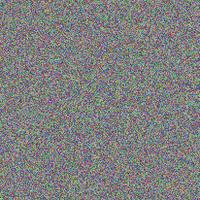

In [ ]:
from IPython.display import Image, display
display(Image("0.jpeg"))

## Visualize the first 16 filters in the target layer

Now, let's make a 8x8 grid of the first 64 filters
in the target layer to get of feel for the range
of different visual patterns that the model has learned.


In [ ]:
# Compute image inputs that maximize per-filter activations
# for the first 16 filters of our target layer
all_imgs = []
n = 5
for filter_index in range(n*n):
    print("Processing filter %d" % (filter_index,))
    loss, img = visualize_filter(filter_index)
    img = Image_PIL.fromarray(img)
    img = img.resize((200,200),Image_PIL.ANTIALIAS)
    img = np.array(img)
    all_imgs.append(img)

# Build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin = 1

cropped_width = 200
cropped_height = 200
width = n * cropped_width + (n - 1) * margin
height = n * cropped_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# Fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img = all_imgs[i * n + j]
        stitched_filters[
            (cropped_width + margin) * i : (cropped_width + margin) * i + cropped_width,
            (cropped_height + margin) * j : (cropped_height + margin) * j
            + cropped_height,
            :,
        ] = img

keras.preprocessing.image.save_img("stiched_filters.png", stitched_filters)

Processing filter 0
Processing filter 1
Processing filter 2
Processing filter 3
Processing filter 4
Processing filter 5
Processing filter 6
Processing filter 7
Processing filter 8
Processing filter 9
Processing filter 10
Processing filter 11
Processing filter 12
Processing filter 13
Processing filter 14
Processing filter 15


In [ ]:
from IPython.display import Image, display

display(Image("stiched_filters.png"))

Output hidden; open in https://colab.research.google.com to view.

Image classification models see the world by decomposing their inputs over a "vector
basis" of texture filters such as these.

See also
[this old blog post](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html)
for analysis and interpretation.


# Grad CAM

## Configurable parameters

You can change these to another model.

To get the values for `last_conv_layer_name` use `model.summary()`
to see the names of all layers in the model.

In [179]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, None, None, 64)    1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 64)   0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, None, None, 64)    0         
                                                                 
 conv2d_7 (Conv2D)           (None, None, None, 32)    18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, None, None, 32)   

In [180]:
# The dimensions of our input image
img_width = 256
img_height = 256
img_type = "rgb" #rgb or gray
last_conv_layer_name = "conv2d_8"

In [181]:

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


Predicted: good roads
True: good roads


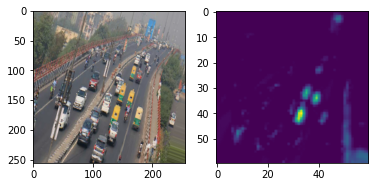

Predicted: good roads
True: good roads


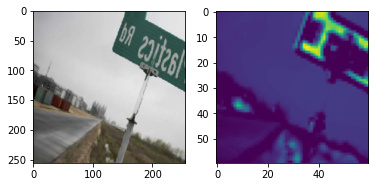

Predicted: good roads
True: good roads


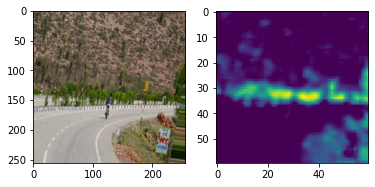

Predicted: potholes
True: potholes


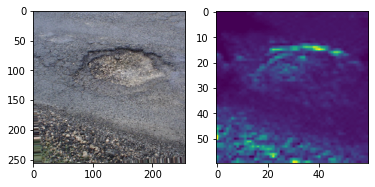

Predicted: potholes
True: potholes


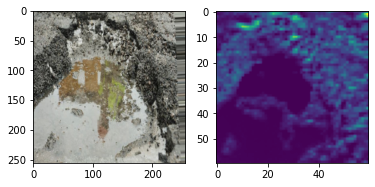

Predicted: good roads
True: good roads


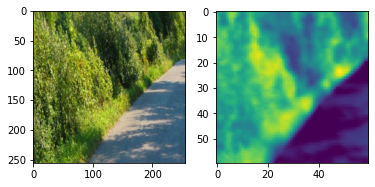

Predicted: good roads
True: good roads


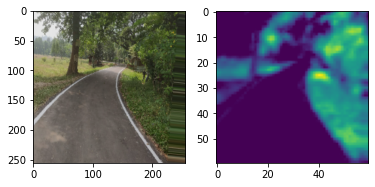

Predicted: good roads
True: good roads


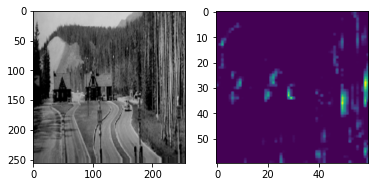

Predicted: good roads
True: good roads


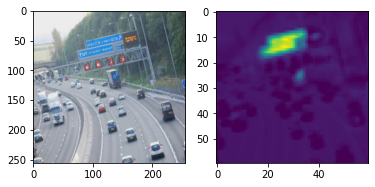

Predicted: potholes
True: potholes


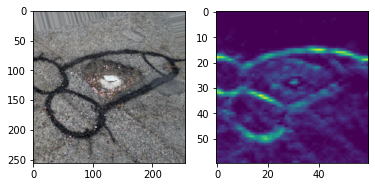

Predicted: potholes
True: potholes


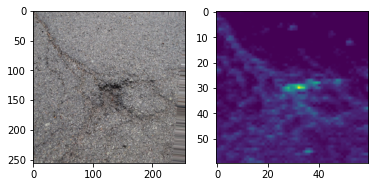

Predicted: potholes
True: potholes


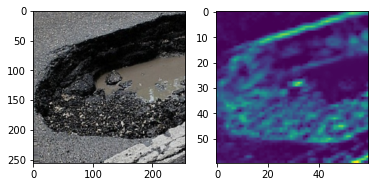

Predicted: potholes
True: potholes


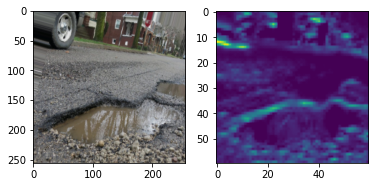

Predicted: good roads
True: good roads


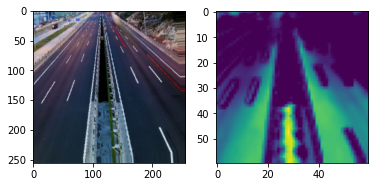

Predicted: good roads
True: good roads


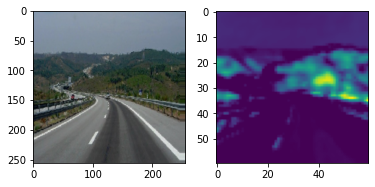

Predicted: potholes
True: good roads


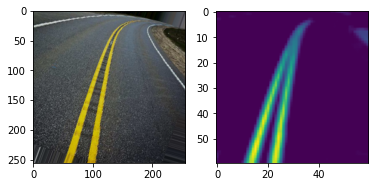

In [185]:
# Prepare image
images, labels = validation_generator.next()

class_names = ["good roads", "potholes"]

for index in range(16):
  img = images[index]
  true_label = np.argmax(labels[index])
  
  img_array = np.expand_dims(img, axis=0)

  # Remove last layer's softmax
  model.layers[-1].activation = None

  # Print what the top predicted class is
  preds = model.predict(img_array)
  print("Predicted:", class_names[np.argmax(preds)])
  print("True:", class_names[true_label])

  # Generate class activation heatmap
  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  # # Display heatmap
  # plt.matshow(heatmap)
  # plt.show()

  fig = plt.figure()
  ax1 = fig.add_subplot(1,2,1)
  ax1.imshow(np.squeeze(img), cmap="gray")
  ax2 = fig.add_subplot(1,2,2)
  ax2.imshow(heatmap)
  plt.show()